In [1]:
import time
import pandas as pd
import re
import nltk 
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import sys
import os
import string
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline

In [2]:
import chardet
with open('tweets.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1254',
 'confidence': 0.4766452024890565,
 'language': 'Turkish'}

In [3]:
df=pd.read_csv('tweets.csv',encoding='latin-1')

In [4]:
df=df[['id',"tweet",]]

In [5]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
df['stopwords']=df['tweet'].apply(lambda x:len([x for x in x.split() if x in stop]))

In [6]:
from better_profanity import profanity
def cleanHtml(sentence): #removes links
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

def removeSwearing(sentence):
    cleaned = re.profanity.censor(sentence)
    return cleaned

def cleanPunc(sentence): #removes punctuation and special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r' ',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/|_|-]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keepAlpha(sentence): 
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent


def decontraction(text):         
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    
    return text

In [7]:
df['tweet'] = df['tweet'].str.lower()
df['tweet'] = df['tweet'].apply(cleanHtml)
df['tweet'] = df['tweet'].apply(cleanPunc)
df['tweet'] = df['tweet'].apply(keepAlpha)
df['tweet'] = df['tweet'].apply(decontraction)

In [8]:
from nltk.corpus import stopwords
stop_words = list(set(stopwords.words('english')))
len(stop_words)

179

In [9]:
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

In [10]:
df['tweet'] = df['tweet'].apply(removeStopWords)

In [11]:
def create_wordcloud(text):
    #mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    cleaned_word = " ".join([word for word in text.split()])
    wc = WordCloud(
    #mask = mask,
    max_words=3000,
    min_word_length =3,
    collocation_threshold = 20,
    stopwords=stopwords,
    repeat=True)
    wc.generate(cleaned_word)
    
    return wc

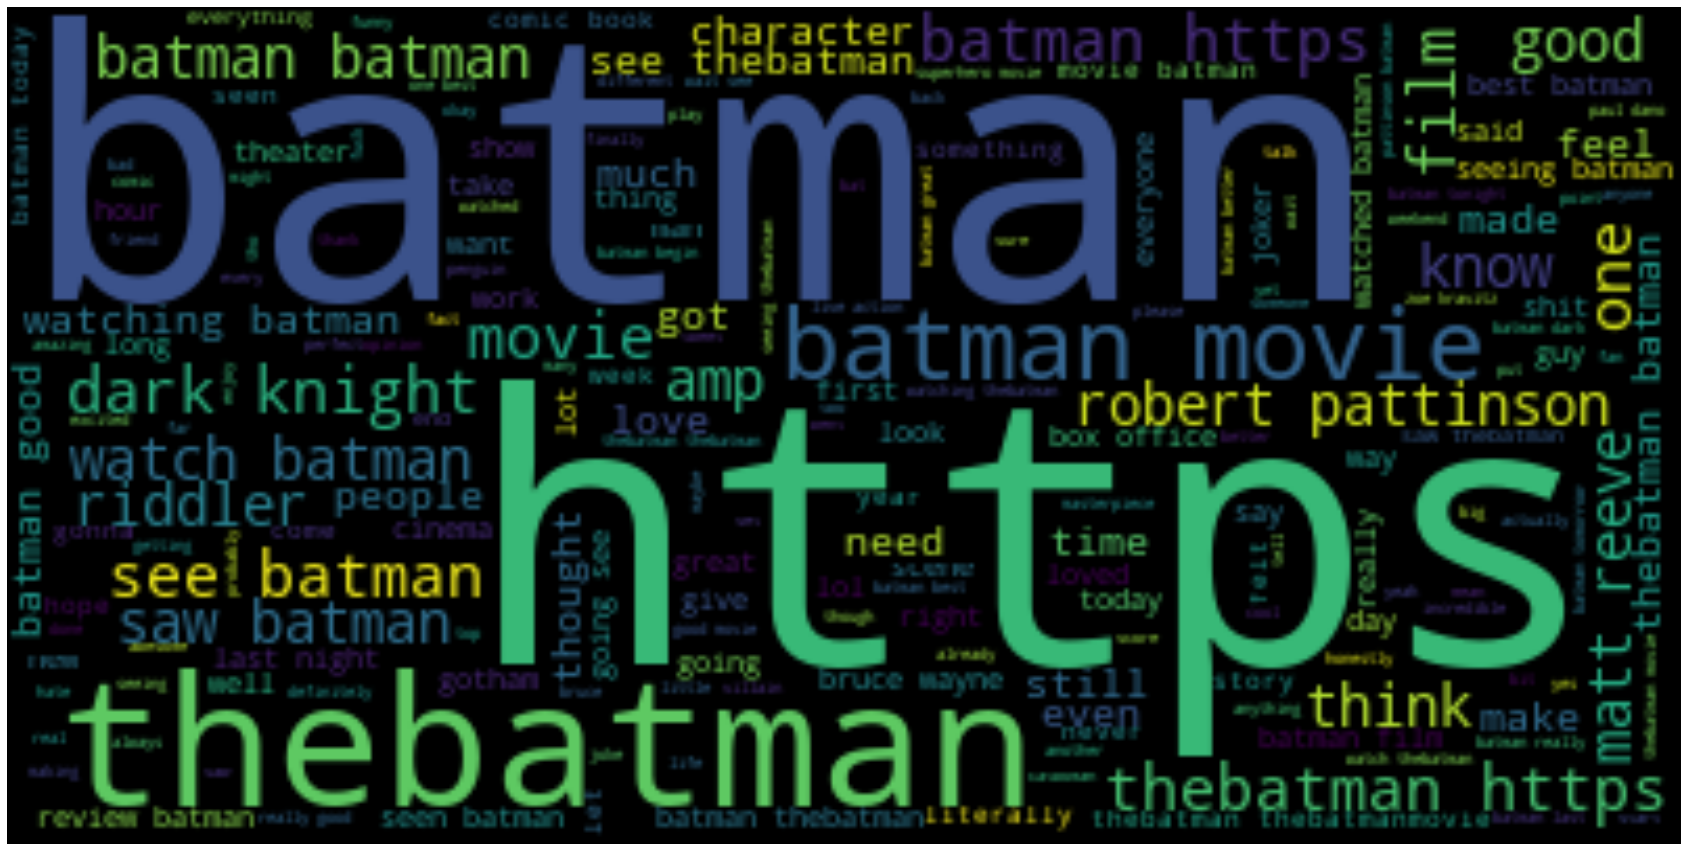

In [12]:
wordcloud =  create_wordcloud(' '.join(df['tweet']))
fig = plt.figure(1,figsize=(30, 50))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [13]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer

In [14]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

In [15]:
positive = 0
negative = 0
neutral = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for i in range(df.shape[0]):
 
   
    tweet_list.append(df.tweet[i])
    score = SentimentIntensityAnalyzer().polarity_scores(df.tweet[i])
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
 
    if neg > pos:
        negative_list.append(df.tweet[i])
        negative += 1
    elif pos > neg:
        positive_list.append(df.tweet[i])
        positive += 1
    elif pos == neg:
        neutral_list.append(df.tweet[i])
        neutral += 1
positive = percentage(positive, df.shape[0])
negative = percentage(negative, df.shape[0])
neutral = percentage(neutral, df.shape[0])
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [16]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  36715
positive number:  19000
negative number:  5855
neutral number:  11860


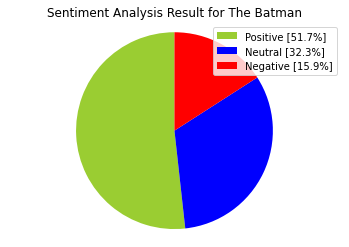

In [17]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for The Batman" )
plt.axis('equal')
plt.show()

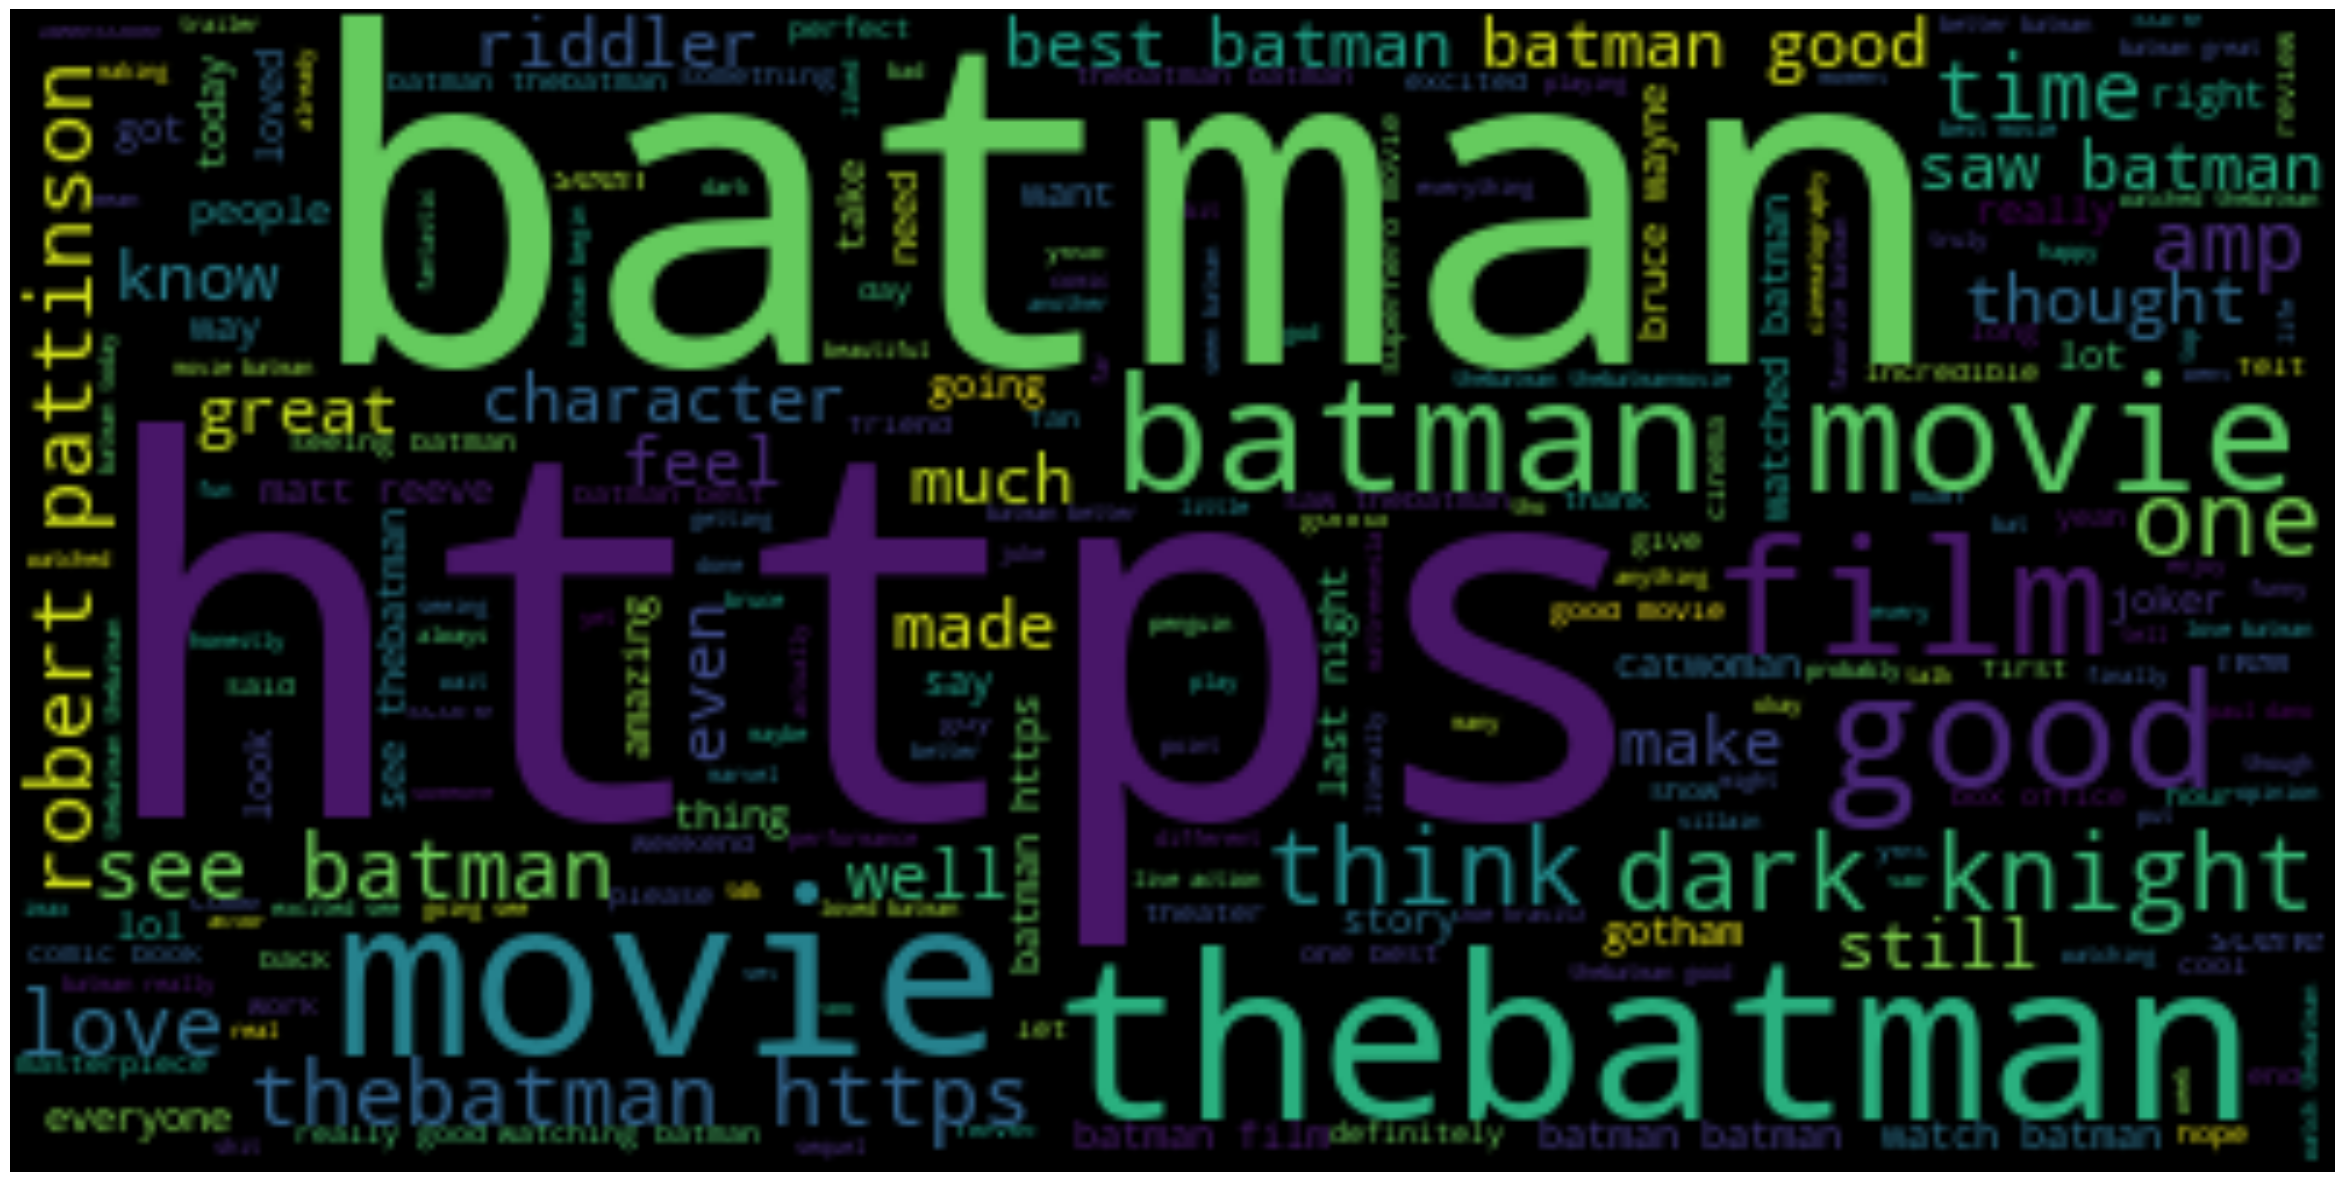

In [18]:
wordcloud = create_wordcloud(' '.join(positive_list[0]))
fig = plt.figure(1,figsize=(30, 50))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
text = ' '.join(negative_list[0])
text_dictionary = wordcloud.process_text(text)
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}
rel_freq = wordcloud.words_
print("Most frequent words")
print(list(word_freq.items())[0:50])
print("Least frequent words")
print(list(word_freq.items())[-100:-50])

Most frequent words
[('batman', 2516), ('https', 1255), ('thebatman', 1074), ('movie', 649), ('one', 349), ('batman movie', 348), ('film', 272), ('people', 266), ('see batman', 251), ('shit', 249), ('really', 232), ('think', 217), ('riddler', 209), ('time', 200), ('know', 200), ('amp', 199), ('bad', 195), ('thebatman https', 195), ('robert pattinson', 180), ('still', 172), ('watch batman', 169), ('make', 167), ('even', 166), ('say', 166), ('going', 165), ('new', 163), ('got', 161), ('villain', 157), ('character', 155), ('take', 148), ('need', 147), ('way', 142), ('fuck', 142), ('dark knight', 141), ('hate', 138), ('thing', 137), ('good', 134), ('much', 130), ('matt reeve', 129), ('watching batman', 124), ('day', 120), ('theater', 116), ('fucking', 115), ('want', 115), ('long', 115), ('scene', 113), ('never', 113), ('gotham', 112), ('actually', 109), ('thought', 109)]
Least frequent words
[('battinsonmarvel jesabelraay', 1), ('wossy blueeye', 1), ('cancerous birthmark', 1), ('birthmark 

In [20]:
import wordlist
wordcloud = create_wordcloud(' '.join(negative_list[0]))
fig = plt.figure(1,figsize=(30, 50))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

NameError: name 'ALL_WORDS' is not defined